In [ ]:
!pip install gym=='0.25.2'
!pip install tqdm

In [2]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

# 0. Simple Policy function


Write a function that computes to policy with a weight of a matrix.

* Prototype: `def policy(matrix, weight):`


In [3]:
def policy(matrix, weight):
    dot = matrix @ weight
    return np.exp(dot) / np.sum(np.exp(dot))

In [ ]:
weight = np.ndarray((4, 2), buffer=np.array([
    [4.17022005e-01, 7.20324493e-01],
    [1.14374817e-04, 3.02332573e-01],
    [1.46755891e-01, 9.23385948e-02],
    [1.86260211e-01, 3.45560727e-01]
    ]))
state = np.ndarray((1, 4), buffer=np.array([
    [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
    ]))

res = policy(state, weight)
print(res)

[[0.50351642 0.49648358]]


# 1. Compute the Monte-Carlo policy gradient


By using the previous function created policy, write a function that computes the Monte-Carlo policy gradient based on a state and a weight matrix.

* Prototype: `def policy_gradient(state, weight):`
    * `state:` matrix representing the current observation of the environment
    * `weight:` matrix of random weight
* Return: the action and the gradient (in this order)


In [4]:
def policy_gradient(state, weight):
    probs = policy(state, weight)
    action = np.random.choice(len(probs[0]), p=probs[0])

    sm = probs.reshape((-1, 1))
    jac = np.diagflat(probs) - (sm @ sm.T)
    sm_derivative = jac[action, :]

    log_derivative = sm_derivative / probs[0, action]

    gradient = state.T @ log_derivative[None, :]

    return action, gradient

In [ ]:
env = gym.make('CartPole-v1')
np.random.seed(1)

weight = np.random.rand(4, 2)
state = env.reset()[None,:]
print(weight)
print(state)

# Create new state values to match example file to test function
state = np.ndarray((1, 4), buffer=np.array([
    [ 0.04228739, -0.04522399,  0.01190918, -0.03496226]
    ]))

action, grad = policy_gradient(state, weight)
print(action)
print(grad)

env.close()

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]]
[[ 0.04929    -0.01317793  0.00129089  0.03289708]]
0
[[ 0.02106907 -0.02106907]
 [-0.02253218  0.02253218]
 [ 0.00593357 -0.00593357]
 [-0.01741943  0.01741943]]


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# 2. Implement the training

By using the previous function created `policy_gradient`, write a function that implements a full training.

* Prototype: `def train(env, nb_episodes, alpha=0.000045, gamma=0.98):`
    * `env`: initial environment
    * `nb_episodes`: number of episodes used for training
    * `alpha`: the learning rate
    * `gamma`: the discount factor
* Return: all values of the score (sum of all rewards during one episode loop)



Since the training is quite long, please print the current episode number and the score after each loop. To display these information on the same line, you can use `end="\r", flush=False` of the print function.

In [ ]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    # initialize weight matrix randomly
    n_obs = env.observation_space.shape[0]
    n_actions = env.action_space.n
    weight = np.random.rand(n_obs, n_actions)

    # track score for all episodes
    scores = []

    # episode loop
    for episode in tqdm(range(nb_episodes)):

        # get initial episode state
        state = env.reset()[None, :]

        # initialize episode gradients, rewards, and score
        gradients = []
        rewards = []
        score = 0

        # step loop
        done = False
        while not done:

            # perform action and gradient according to policy
            action, gradient = policy_gradient(state, weight)
            observation, reward, done, _ = env.step(action)

            # update gradients, rewards, and score
            gradients.append(gradient)
            rewards.append(reward)
            score += reward

            state = observation[None, :]

        # add score to total scores
        scores.append(score)

        # print score every 500 episodes
        if episode % 500 == 0:
            print(f'Episode: {episode}, Score: {score}')

        # update weights
        rewards = np.array(rewards)
        for i in range(len(gradients)):
            learning = alpha * gradients[i]
            discount = np.sum(gamma ** rewards[i:] * rewards[i:])
            weight += learning * discount

    return scores

  0%|          | 0/10000 [00:00<?, ?it/s]

Episode: 0, Score: 27.0
Episode: 500, Score: 14.0
Episode: 1000, Score: 26.0
Episode: 1500, Score: 30.0
Episode: 2000, Score: 116.0
Episode: 2500, Score: 43.0
Episode: 3000, Score: 500.0
Episode: 3500, Score: 329.0
Episode: 4000, Score: 161.0
Episode: 4500, Score: 479.0
Episode: 5000, Score: 500.0
Episode: 5500, Score: 500.0
Episode: 6000, Score: 500.0
Episode: 6500, Score: 500.0
Episode: 7000, Score: 500.0
Episode: 7500, Score: 500.0
Episode: 8000, Score: 500.0
Episode: 8500, Score: 500.0
Episode: 9000, Score: 500.0
Episode: 9500, Score: 500.0


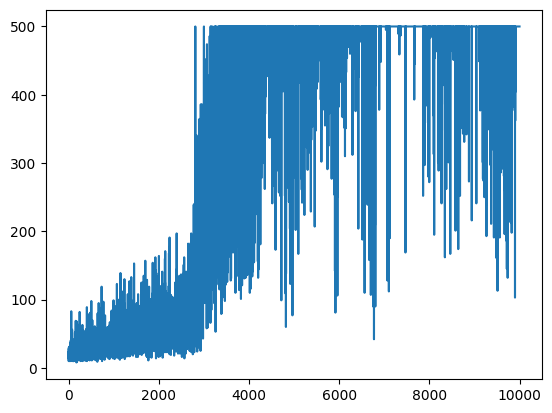

In [ ]:
env = gym.make('CartPole-v1')

scores = train(env, 10000)

plt.plot(np.arange(len(scores)), scores)
plt.show()
env.close()

# 3. Animate iteration

Update the prototype of the `train` function by adding a last optional parameter `show_result` (default: `False`).

When this parameter is `True`, render the environment every 1000 episodes computed.

In [ ]:
!brew install ffmpeg

In [5]:
from IPython.display import display, HTML
from base64 import b64encode


def show_video(video_path, video_width = 600):

    video_file = open(video_path, "r+b").read()

    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"

    display(HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>"""))

In [6]:
from gym.wrappers.record_video import RecordVideo

def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):

    # set RecordVideo wrapper to record every 1000 episodes
    if show_result:
        env = gym.wrappers.RecordVideo(env, 'video', episode_trigger = lambda x: (x + 1) % 1000 == 0)

    # initialize weight matrix randomly
    n_obs = env.observation_space.shape[0]
    n_actions = env.action_space.n
    weight = np.random.rand(n_obs, n_actions)

    # track score for all episodes
    scores = []

    # episode loop
    for episode in tqdm(range(nb_episodes)):

        # get initial episode state
        state = env.reset()[None, :]

        # initialize episode gradients, rewards, and score
        gradients = []
        rewards = []
        score = 0

        # step loop
        done = False
        while not done:

            # perform action and gradient according to policy
            action, gradient = policy_gradient(state, weight)
            observation, reward, done, _ = env.step(action)

            # update gradients, rewards, and score
            gradients.append(gradient)
            rewards.append(reward)
            score += reward

            state = observation[None, :]

        # add score to total scores
        scores.append(score)

        # print score every 1000 episodes
        if (episode + 1) % 500 == 0:
            print(f'After {episode + 1} episodes, score: {score}')

        # display attempt
        if show_result and (episode + 1) % 1000 == 0:
            show_video(f'video/rl-video-episode-{episode}.mp4')

        # update weights
        rewards = np.array(rewards)
        for i in range(len(gradients)):
            learning = alpha * gradients[i]
            discount = np.sum(gamma ** rewards[i:] * rewards[i:])
            weight += learning * discount

    return scores

In [13]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

scores = train(env, 10000, 0.000045, 0.98, True)

env.close()

  0%|          | 0/10000 [00:00<?, ?it/s]

After 500 episodes, score: 20.0
After 1000 episodes, score: 25.0


After 1500 episodes, score: 37.0
After 2000 episodes, score: 145.0


After 2500 episodes, score: 500.0
After 3000 episodes, score: 500.0


After 3500 episodes, score: 320.0
After 4000 episodes, score: 500.0


After 4500 episodes, score: 500.0
After 5000 episodes, score: 500.0


After 5500 episodes, score: 356.0
After 6000 episodes, score: 500.0


After 6500 episodes, score: 283.0
After 7000 episodes, score: 500.0


After 7500 episodes, score: 500.0
After 8000 episodes, score: 436.0


After 8500 episodes, score: 500.0
After 9000 episodes, score: 410.0


After 9500 episodes, score: 500.0
After 10000 episodes, score: 398.0


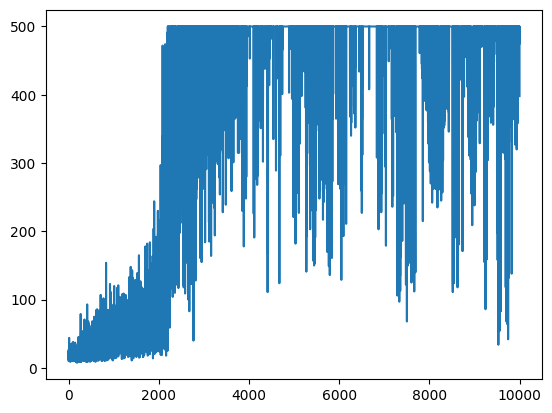

In [14]:
plt.plot(np.arange(len(scores)), scores)
plt.show()